# Read the output of a complete RF-Track simulation of positrons in the Capture System (CS) up to the end of the positron linac

## Import the required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#%matplotlib ipympl

from matplotlib.ticker import AutoMinorLocator
import matplotlib.colors as mcolors
import os
import uproot
import math
import re

from G4_utils import *
from G4_read_output_files import *

# Ignore SettingWithCopyWarning in Pandas
pd.options.mode.chained_assignment = None  # default='warn'

## Set input path and base filenames

In [2]:
#path_G4 = "C:/DATI/Geant4/PositronSource-build/output/RF-Track_code/"
#path_RFTrack = path_G4

path_G4 = "/home/paterno/geant4-apps/PositronSource-build/output/results_2.86GeV_sigma1.0mm_W5-20mm_conventional_gp/analysis_output/"
filename_G4 = "positrons_2.86GeV_W15.0mm_conventional"
path_RFTrack = "/home/paterno/geant4-apps/PositronSource-build/RF-Track_code/input/input_2.86GeV_sigma1.0mm_W5-20mm_conventional_gp/"
case = 'W15.0mm_conventional'

#path_G4 = "/home/paterno/geant4-apps/PositronSource-build/output/results_2.86GeV_sigma1.0mm_W8-16mm_crystalline_gp/analysis_output/"
#filename_G4 = "positrons_2.86GeV_W12.0mm_crystalline_mis0.000rad_pot0.050A"
#path_RFTrack = "/home/paterno/geant4-apps/PositronSource-build/RF-Track_code/input/input_2.86GeV_sigma1.0mm_W8-16mm_crystalline_gp/"
#case = 'W12.0mm_crystalline_mis0.000rad_pot0.050A'

#path_G4 = "/home/paterno/geant4-apps/PositronSource-build/output/results_2.86GeV_sigma1.0mm_W12mm_crystalline_mis_HT_gp/analysis_output/"
#filename_G4 = "positrons_2.86GeV_W12.0mm_crystalline_mis0.000rad_pot0.065A"
#path_RFTrack = "/home/paterno/geant4-apps/PositronSource-build/RF-Track_code/input/input_6GeV_sigma0.5mm_W12mm_crystalline_mis_HT_gp/"
#case = 'mis0.000rad_pot0.065A'

#path_G4 = "/home/paterno/geant4-apps/PositronSource-build/output/results_6GeV_sigma0.5mm_W4-24mm_conventional_gp/analysis_output/"
#filename_G4 = "positrons_6GeV_W17.0mm_conventional"
#path_RFTrack = "/home/paterno/geant4-apps/PositronSource-build/RF-Track_code/input/input_6GeV_sigma0.5mm_W4-24mm_conventional_gp/"
#case = 'W17.0mm_conventional'

#path_G4 = "/home/paterno/geant4-apps/PositronSource-build/output/results_6GeV_sigma0.5mm_W9-15mm_crystalline_gp/analysis_output/"
#filename_G4 = "positrons_6GeV_W12.0mm_crystalline_mis0.000rad_pot0.050A"
#path_RFTrack = "/home/paterno/geant4-apps/PositronSource-build/RF-Track_code/input/input_6GeV_sigma0.5mm_W9-15mm_crystalline_gp/"
#case = 'W12.0mm_crystalline_mis0.000rad_pot0.050A'

#path_G4 = "/home/paterno/geant4-apps/PositronSource-build/output/results_6GeV_sigma0.5mm_W12mm_crystalline_mis_HT_gp/analysis_output/"
#filename_G4 = "positrons_6GeV_W12.0mm_crystalline_mis0.000rad_pot0.065A"
#path_RFTrack = "/home/paterno/geant4-apps/PositronSource-build/RF-Track_code/input/input_6GeV_sigma0.5mm_W12mm_crystalline_mis_HT_gp/"
#case = 'mis0.000rad_pot0.065A'

#path_G4 = "/home/paterno/geant4-apps/PositronSource-build/output/results_6GeV_sigma0.5mm_W_radiator2mm_D50cm_target6-15mm_gp/analysis_output/"
#filename_G4 = "positrons_6GeV_W2.0mm_D50cm_target12.0mm"
#path_RFTrack = "/home/paterno/geant4-apps/PositronSource-build/RF-Track_code/input/input_6GeV_sigma0.5mm_W_radiator2mm_D50cm_target6-15mm_gp/"
#case = 'target12.0mm'

#path_G4 = "/home/paterno/geant4-apps/PositronSource-build/output/test_tracking_v2/"
#filename_G4 = "positrons_6GeV_W2.0mm_D0cm_target9.0mm"
#path_RFTrack = "/home/paterno/geant4-apps/PositronSource-build/RF-Track_code/input/test_tracking_v2/"
#case = 'D0cm_target9.0mm'


filename_AMD_out = "output_AMD_" + case
filename_AMD_loss = filename_AMD_out + "_loss"
filename_CS_out = "output_CS_" + case
filename_CS_loss = filename_CS_out + "_loss"
filename_RF_acc = "output_RF_" + case + "_acc"
filename_PL_out = "output_PL_" + case
filename_PL_acc = filename_PL_out + "_acc"

Ne = 1e4 #number of simulated electrons

## ID option

In [3]:
use_ID = True

if use_ID:
    columns = ["x[mm]", "xp[mrad]", "y[mm]", "yp[mrad]", "t[mm/c]", "p[MeV/c]", "ID"]
else:
    columns = ["x[mm]", "xp[mrad]", "y[mm]", "yp[mrad]", "t[mm/c]", "p[MeV/c]"]

## Save and export settings

In [4]:
saveFigs = True
outpath = path_G4

## Read the text files with the phase space of the positrons before and after the AMD

In [5]:
df_AMD_in = pd.read_csv(path_G4 + filename_G4 + '.dat', sep=" ", header=0, skip_blank_lines=True)
if use_ID:
    df_AMD_in["ID"] = list(range(1, len(df_AMD_in)+1)) #add particle ID 
df_AMD_in.columns = columns
df_AMD_in.describe()

x[mm]      xp[mrad]         y[mm]      yp[mrad]       t[mm/c]  \
count  70863.000000  7.086300e+04  70863.000000  7.086300e+04  70863.000000   
mean      -0.009454  7.095101e+01     -0.016132 -2.121901e+00     17.760348   
std        1.757025  1.871671e+04      1.696245  1.258315e+04      1.193588   
min     -135.150868 -1.306098e+06   -130.969639 -1.481819e+06     12.801858   
25%       -0.827979 -1.876421e+02     -0.826304 -1.935646e+02     16.956709   
50%       -0.002897  8.343531e-01     -0.017828 -4.327192e-01     17.757607   
75%        0.816134  1.904973e+02      0.795981  1.889349e+02     18.565695   
max       81.330247  3.796489e+06     86.681273  2.461155e+06     22.516034   

           p[MeV/c]          ID  
count  70863.000000  70863.0000  
mean      44.973275  35432.0000  
std       91.002881  20456.5304  
min        0.207567      1.0000  
25%        7.987977  17716.5000  
50%       18.317757  35432.0000  
75%       43.685355  53147.5000  
max     2065.172625  70863.0000

In [6]:
# Select only significant angles, otherwise some points have no meaning and alter the tranverse properties calculation
df_AMD_in_sel = df_AMD_in[np.arctan(np.sqrt(df_AMD_in['xp[mrad]']**2 + df_AMD_in['yp[mrad]']**2)*1e-3) < 1.3]
df_AMD_in_sel.describe()

x[mm]      xp[mrad]         y[mm]      yp[mrad]       t[mm/c]  \
count  69251.000000  69251.000000  69251.000000  69251.000000  69251.000000   
mean      -0.007328      1.632956     -0.014896     -3.008074     17.760396   
std        1.429986    558.927680      1.437630    558.491299      1.193047   
min      -33.414647  -3580.978803    -31.110558  -3531.918079     12.801858   
25%       -0.824677   -180.605734     -0.821659   -185.511774     16.956709   
50%       -0.002774      0.842495     -0.017529     -0.349589     17.758231   
75%        0.811943    183.114228      0.792416    181.977269     18.565376   
max       21.125142   3492.975920     36.829496   3565.396081     22.516034   

           p[MeV/c]            ID  
count  69251.000000  69251.000000  
mean      45.867657  35451.274148  
std       91.860957  20459.604694  
min        0.222125      1.000000  
25%        8.344041  17749.500000  
50%       18.957894  35456.000000  
75%       44.804846  53171.500000  
max     2065.172625  70863.000000

In [7]:
df_AMD_out = pd.read_csv(path_RFTrack + filename_AMD_out + '.dat', sep=" ", header=5, skip_blank_lines=True)
row1_list = [round(float(df_AMD_out.columns[1:][i]), len(df_AMD_out)) for i in range(len(df_AMD_out.columns)-1)]
row1_dict = {}
for i in range(len(columns)):
    row1_dict[columns[i]] = row1_list[i]
row1 = pd.DataFrame(row1_dict, index =[0])
df_AMD_out = df_AMD_out.iloc[:,1:]
df_AMD_out.columns = columns
df_AMD_out = pd.concat([row1, df_AMD_out]).reset_index(drop=True)
df_AMD_out.describe()

x[mm]      xp[mrad]         y[mm]      yp[mrad]       t[mm/c]  \
count  68353.000000  68353.000000  68353.000000  68353.000000  68353.000000   
mean      -0.072993     -0.520508     -0.093226     -0.280353    255.815473   
std       11.521223     88.388864     11.624224     88.751794     18.168486   
min      -74.405010   -468.322744    -70.562360   -503.123123    239.636982   
25%       -6.490183    -48.573668     -6.511198    -48.208455    245.323329   
50%       -0.055310     -0.475344     -0.061193     -0.031472    248.474173   
75%        6.376581     47.652726      6.335455     47.970012    259.022342   
max       74.010682    495.642903     69.363946    486.719704    795.123781   

           p[MeV/c]            ID  
count  68353.000000  68353.000000  
mean      44.784156  35419.882917  
std       92.482619  20449.618142  
min        0.214526      1.000000  
25%        7.796389  17715.000000  
50%       17.496427  35400.000000  
75%       41.360673  53104.000000  
max     2065.172625  70863.000000

## Apply a cut: positron beam accepted by the CS (within the iris)

In [8]:
R_iris_CS = 30 #mm

df_AMD_out_acc = df_AMD_out[df_AMD_out['x[mm]']**2 + df_AMD_out['y[mm]']**2 < R_iris_CS**2]

print("eff_AMD: %.2f" % (len(df_AMD_out)/len(df_AMD_in)))
print("yield_AMD: %.2f\n" % (len(df_AMD_out)/Ne))
print("eff_AMD_acc: %.2f" % (len(df_AMD_out_acc)/len(df_AMD_in)))
print("yield_AMD_acc: %.2f\n\n" % (len(df_AMD_out_acc)/Ne))

df_AMD_out_acc.describe()

eff_AMD: 0.96
yield_AMD: 6.84

eff_AMD_acc: 0.91
yield_AMD_acc: 6.42




x[mm]      xp[mrad]         y[mm]      yp[mrad]       t[mm/c]  \
count  64207.000000  64207.000000  64207.000000  64207.000000  64207.000000   
mean      -0.057398     -0.463102     -0.075553     -0.182336    255.447510   
std        9.677375     81.030634      9.694838     81.078311     18.140952   
min      -29.966745   -347.419369    -29.931867   -358.291713    239.636982   
25%       -6.098468    -45.752685     -6.128026    -45.402246    245.201841   
50%       -0.044015     -0.463713     -0.047340      0.029115    248.123702   
75%        6.028517     44.951228      5.972777     45.187495    258.095259   
max       29.940797    330.930130     29.959173    343.416156    795.123781   

           p[MeV/c]            ID  
count  64207.000000  64207.000000  
mean      44.393414  35425.422555  
std       94.542297  20453.781914  
min        0.214526      1.000000  
25%        7.503650  17710.500000  
50%       16.627873  35424.000000  
75%       40.414745  53101.500000  
max     2065.172625  70863.000000

## Plot the positron spectrum before and after the AMD (inside the iris)

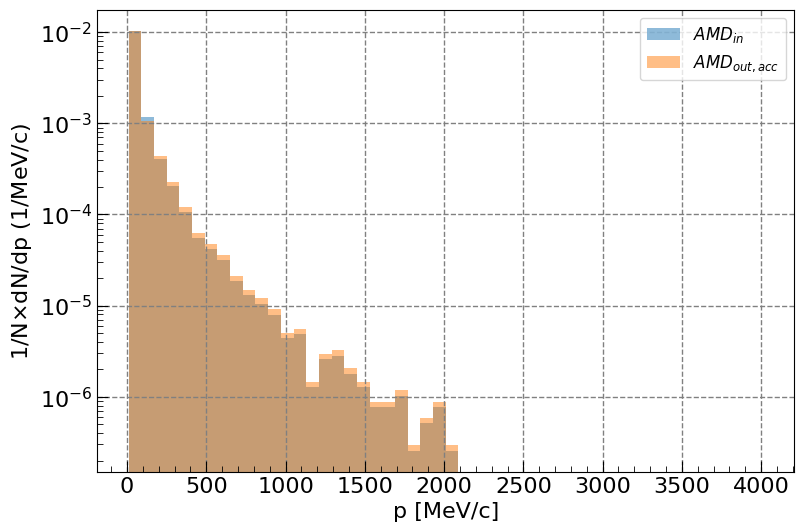

In [9]:
nbin_E_AMD = 50
range_E_AMD = (10, 4010) #MeV

plot_EorPspectrum(p=df_AMD_in['p[MeV/c]'], lbl='$AMD_{in}$', \
                  p2=df_AMD_out_acc['p[MeV/c]'], lbl2='$AMD_{out,acc}$', \
                  isE=False, plotLog=True, opacity=0.5, \
                  IWantDensity=True, NormMax=False, \
                  nbin_E=nbin_E_AMD, range_E=range_E_AMD, solidPlot=True,\
                  myoutpath=outpath+case+"_AMD_in_", saveFigs=saveFigs)

## Get the phase space of the positrons before the AMD (target exit)

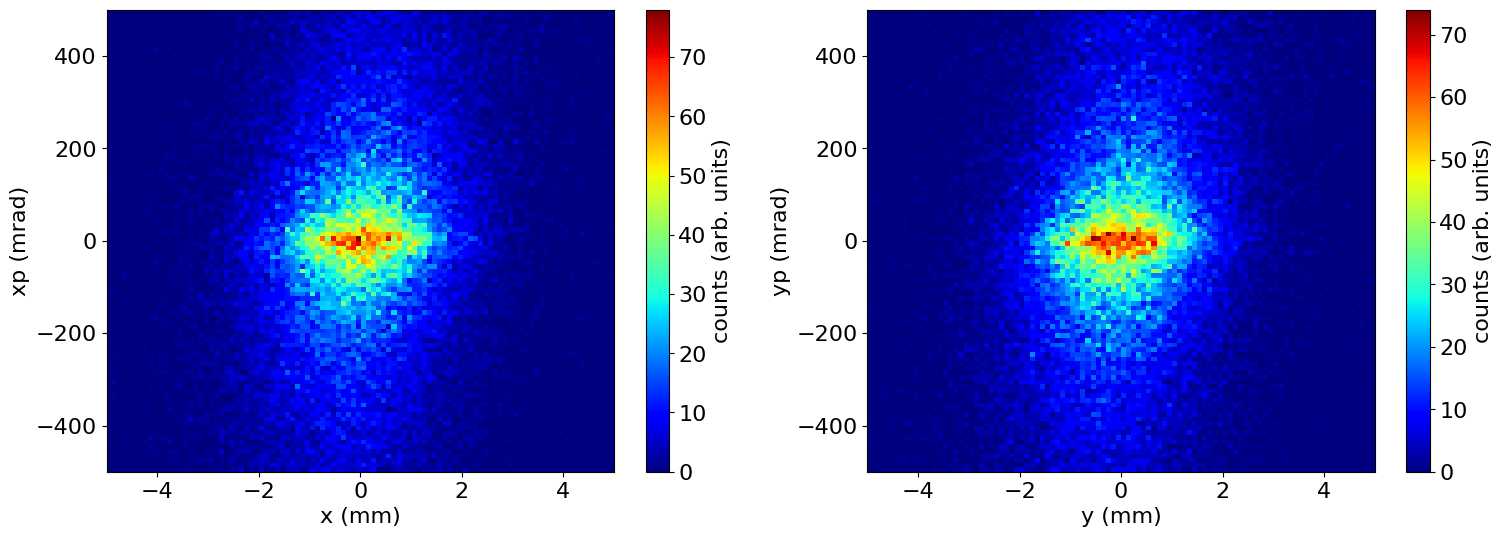

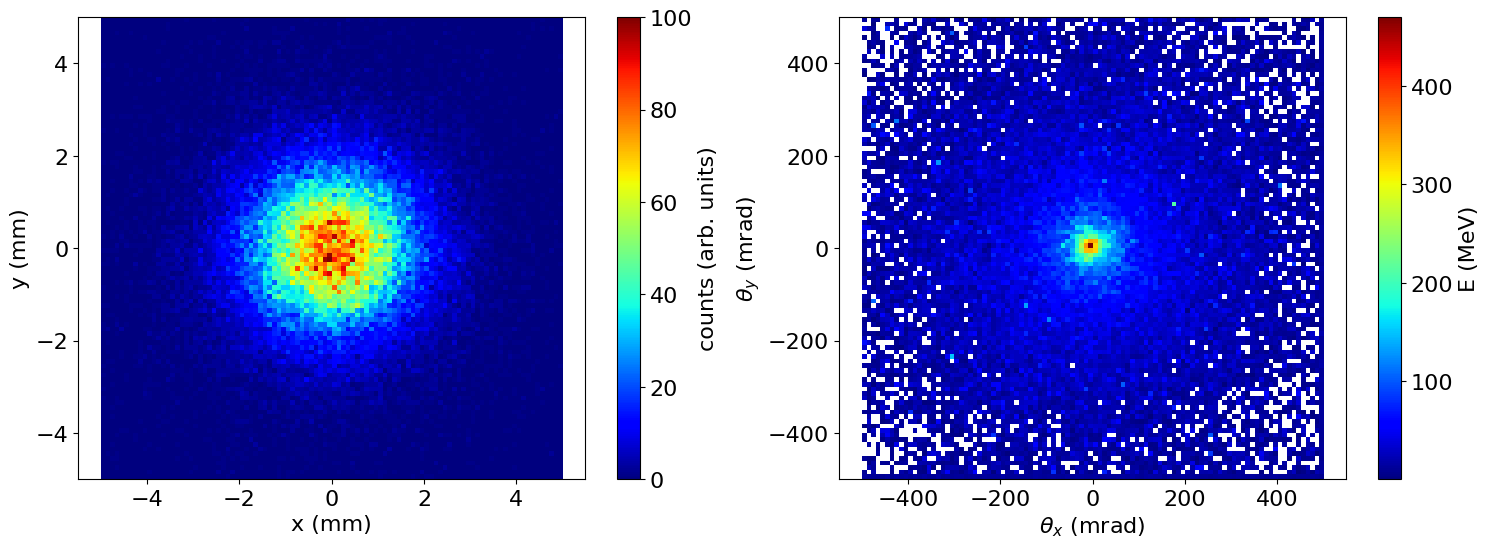

--------------------------------------------------

Beam trace-space Emittances:
em_x_tr = 7.79e-04 m*rad
em_y_tr = 7.84e-04 m*rad
Beam trace-space Emittances:
em_x_n_tr = 6.99e-02 m*rad
em_y_n_tr = 7.04e-02 m*rad
Beam Emittances:
em_x = 4.34e-04 m*rad
em_y = 4.33e-04 m*rad
Beam normalized Emittances:
em_x_n = 1.92e-02 m*rad
em_y_n = 1.91e-02 m*rad

sigma_x = 1.43 mm
sigma_y = 1.44 mm
sigma_xp = 558.92 mrad
sigma_yp = 558.49 mrad
sigma_px = 7.00 MeV/c
sigma_py = 6.95 MeV/c

theta_mean = 4.1068e-01 rad
theta_std = 3.1846e-01 rad
theta_rms = 5.1968e-01 rad
theta_max = 1.2999e+00 rad
--------------------------------------------------

bunch_length = 1.19 mm

mean_energy = 45.8811 MeV
std_energy = 91.8550 MeV
energy_spread = 2.0020
gamma = 89.7869
delta_gamma = 179.7554
--------------------------------------------------

NMP = 69251

--------------------------------------------------

Twiss parameters (calculated using em_x,y_tr):
alpha_x = -0.2313
alpha_y = -0.2222
beta_x = 0.002626 m
bet

In [10]:
plot_RFTrack_transverse_phase_space(df_AMD_in_sel, m=0.511, radius_sel=1e10, \
                                    num_bins_x=100, num_bins_xp=100, \
                                    num_bins_y=100, num_bins_yp=100, \
                                    xrange=[-5, 5], xprange=[-500, 500], \
                                    yrange=[-5, 5], yprange=[-500, 500], \
                                    use_log_scale=False, mymap='jet', \
                                    myoutpath=outpath+case+"_AMD_in_", saveFigs=saveFigs)

noem_em_AMD_in, Twiss_AMD_in = calc_RFTrack_beam_properties(df_AMD_in_sel, m=0.511, beVerbose=True)

## Get the phase space of the positrons after the AMD and accepted by the CS

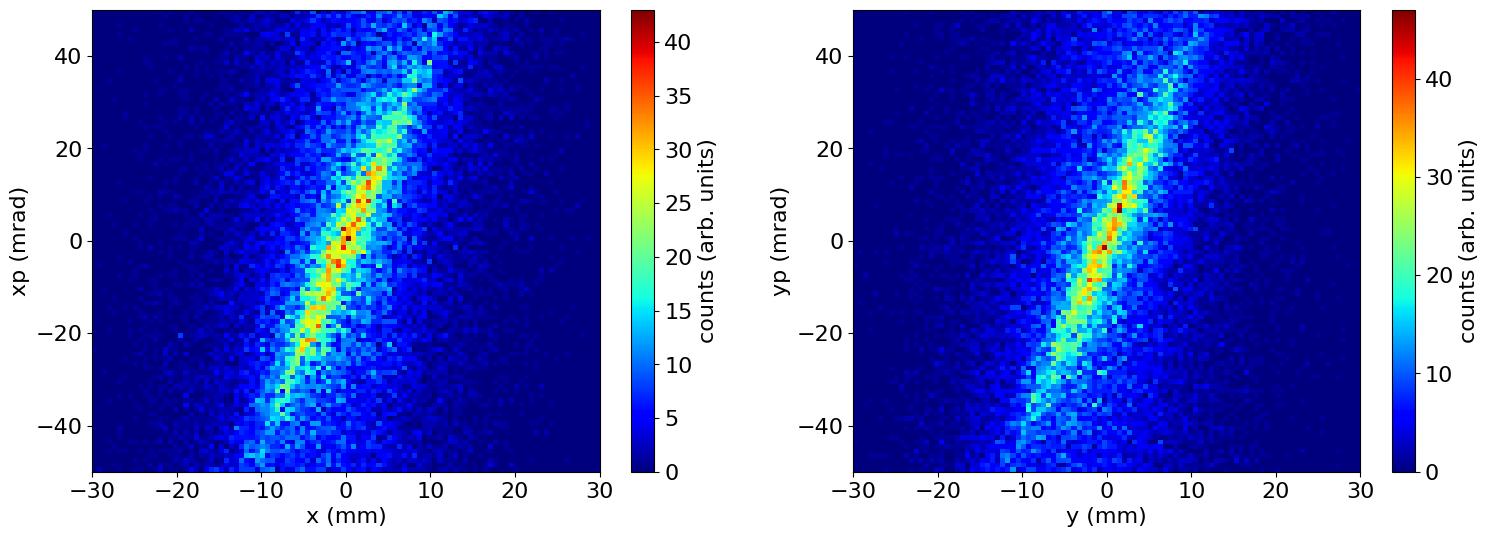

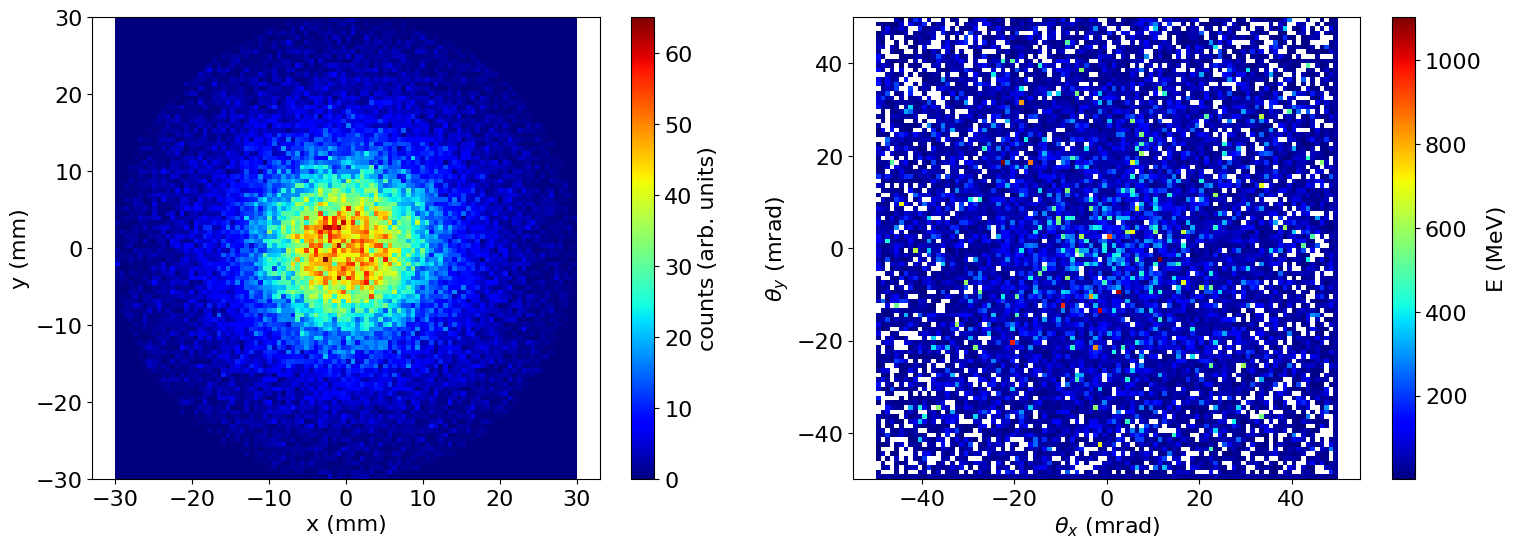

--------------------------------------------------

Beam trace-space Emittances:
em_x_tr = 6.63e-04 m*rad
em_y_tr = 6.60e-04 m*rad
Beam trace-space Emittances:
em_x_n_tr = 5.76e-02 m*rad
em_y_n_tr = 5.74e-02 m*rad
Beam Emittances:
em_x = 1.16e-03 m*rad
em_y = 1.15e-03 m*rad
Beam normalized Emittances:
em_x_n = 5.12e-02 m*rad
em_y_n = 5.11e-02 m*rad

sigma_x = 9.68 mm
sigma_y = 9.69 mm
sigma_xp = 81.03 mrad
sigma_yp = 81.08 mrad
sigma_px = 3.16 MeV/c
sigma_py = 3.17 MeV/c

theta_mean = 9.4922e-02 rad
theta_std = 6.2067e-02 rad
theta_rms = 1.1341e-01 rad
theta_max = 3.4530e-01 rad
--------------------------------------------------

bunch_length = 18.14 mm

mean_energy = 44.4080 MeV
std_energy = 94.5361 MeV
energy_spread = 2.1288
gamma = 86.9042
delta_gamma = 185.0021
--------------------------------------------------

NMP = 64207

--------------------------------------------------

Twiss parameters (calculated using em_x,y_tr):
alpha_x = -0.6316
alpha_y = -0.6457
beta_x = 0.141254 m
beta

In [11]:
plot_RFTrack_transverse_phase_space(df_AMD_out_acc, m=0.511, radius_sel=1e10, \
                                    num_bins_x=100, num_bins_xp=100, \
                                    num_bins_y=100, num_bins_yp=100, \
                                    xrange=[-30, 30], xprange=[-50, 50], \
                                    yrange=[-30, 30], yprange=[-50, 50], \
                                    use_log_scale=False, mymap='jet', \
                                    myoutpath=outpath+case+"_AMD_in_", saveFigs=saveFigs)

norm_em_AMD_out_acc, Twiss_AMD_out_acc = calc_RFTrack_beam_properties(df_AMD_out_acc, m=0.511, beVerbose=True)

## Read the text files with the phase space of the positrons after the CS and the PL

In [12]:
df_CS_out = pd.read_csv(path_RFTrack + filename_CS_out + '.dat', sep=" ", header=5, skip_blank_lines=True)
row1_list = [round(float(df_CS_out.columns[1:][i]), len(df_CS_out)) for i in range(len(df_CS_out.columns)-1)]
row1_dict = {}
for i in range(len(columns)):
    row1_dict[columns[i]] = row1_list[i]
row1 = pd.DataFrame(row1_dict, index =[0])
df_CS_out = df_CS_out.iloc[:,1:]
df_CS_out.columns = columns
df_CS_out = pd.concat([row1, df_CS_out]).reset_index(drop=True)
df_CS_out.describe()

x[mm]      xp[mrad]         y[mm]      yp[mrad]       t[mm/c]  \
count  40013.000000  40013.000000  40013.000000  40013.000000  40013.000000   
mean      -0.079696      0.016889     -0.066158      0.005602  16469.172621   
std        9.172374      7.324309      9.182295      8.001106     23.678521   
min      -29.496062   -371.761409    -29.054999   -596.530874  16425.341209   
25%       -6.016583     -2.368578     -5.968326     -2.367878  16463.534935   
50%       -0.066190     -0.012425     -0.005282     -0.006366  16466.187160   
75%        5.831124      2.352649      5.885860      2.344516  16469.200024   
max       29.203522    608.756464     29.315550    705.910452  18269.920400   

           p[MeV/c]            ID  
count  40013.000000  40013.000000  
mean     214.465381  35500.963837  
std       35.500667  20430.021829  
min        0.738374      3.000000  
25%      202.593279  17834.000000  
50%      217.446437  35514.000000  
75%      232.570608  53192.000000  
max     1607.328296  70863.000000

In [13]:
df_RF_acc = pd.read_csv(path_RFTrack + filename_RF_acc + '.dat', sep=" ", header=5, skip_blank_lines=True)
row1_list = [round(float(df_RF_acc.columns[1:][i]), len(df_RF_acc)) for i in range(len(df_RF_acc.columns)-1)]
row1_dict = {}
for i in range(len(columns)):
    row1_dict[columns[i]] = row1_list[i]
row1 = pd.DataFrame(row1_dict, index =[0])
df_RF_acc = df_RF_acc.iloc[:,1:]
df_RF_acc.columns = columns
df_RF_acc = pd.concat([row1, df_RF_acc]).reset_index(drop=True)
df_RF_acc.describe()

x[mm]      xp[mrad]         y[mm]      yp[mrad]       t[mm/c]  \
count  30229.000000  30229.000000  30229.000000  30229.000000  30229.000000   
mean      -0.069443     -0.035017     -0.070437     -0.021082  16465.578075   
std        9.028643      3.809568      9.082460      3.793954      2.723125   
min      -29.496062    -15.072085    -29.054999    -15.873393  16459.720581   
25%       -5.838799     -2.427722     -5.851947     -2.388812  16463.572896   
50%       -0.055477     -0.025191      0.018763      0.003831  16465.611321   
75%        5.628332      2.369358      5.778152      2.364587  16467.560880   
max       29.203522     14.657143     29.315550     15.248042  16472.251180   

           p[MeV/c]            ID  
count  30229.000000  30229.000000  
mean     216.371621  35467.693076  
std       20.413038  20394.386326  
min      141.631315      8.000000  
25%      206.191552  17875.000000  
50%      217.545347  35419.000000  
75%      229.155446  53109.000000  
max      268.837798  70863.000000

In [14]:
try:
    df_PL_out = pd.read_csv(path_RFTrack + filename_PL_out + '.dat', sep=" ", header=5, skip_blank_lines=True)
    row1_list = [round(float(df_PL_out.columns[1:][i]), len(df_PL_out)) for i in range(len(df_PL_out.columns)-1)]
    for i in range(4):
        row1_list[i] = 0
    row1_dict = {}
    for i in range(len(columns)):
        row1_dict[columns[i]] = row1_list[i]
    row1 = pd.DataFrame(row1_dict, index =[0])
    df_PL_out = df_PL_out.iloc[:,1:]
    df_PL_out.columns = columns
    df_PL_out = pd.concat([row1, df_PL_out]).reset_index(drop=True)
    df_PL_out.drop(columns=df_PL_out.columns[:4], axis=1, inplace=True)
    print(df_PL_out.describe())
    print("\nnumber of e+ moving backward at the exit of PL: %d\n" % len(df_PL_out[df_PL_out["p[MeV/c]"] < 0]["p[MeV/c]"]))   
except:
    print("An exception occurred")     

            t[mm/c]      p[MeV/c]            ID
count  40013.000000  40013.000000  40013.000000
mean   16469.172621   2699.671031  35500.963837
std       23.678521    526.872451  20430.021829
min    16425.341209  -2629.894120      3.000000
25%    16463.534935   2804.943220  17834.000000
50%    16466.187160   2850.022215  35514.000000
75%    16469.200024   2874.736905  53192.000000
max    18269.920400   2907.825247  70863.000000

number of e+ moving backward at the exit of PL: 444



In [15]:
df_PL_acc = pd.read_csv(path_RFTrack + filename_PL_acc + '.dat', sep=" ", header=5, skip_blank_lines=True)
row1_list = [round(float(df_PL_acc.columns[1:][i]), len(df_PL_acc)) for i in range(len(df_PL_acc.columns)-1)]
for i in range(4):
    row1_list[i] = 0
row1_dict = {}
for i in range(len(columns)):
    row1_dict[columns[i]] = row1_list[i]
row1 = pd.DataFrame(row1_dict, index =[0])
df_PL_acc = df_PL_acc.iloc[:,1:]
df_PL_acc.columns = columns
df_PL_acc = pd.concat([row1, df_PL_acc]).reset_index(drop=True)
df_PL_acc.drop(columns=df_PL_acc.columns[:4], axis=1, inplace=True)
df_PL_acc.describe()

t[mm/c]      p[MeV/c]            ID
count  30229.000000  30229.000000  30229.000000
mean   16465.578075   2860.000000  35467.693076
std        2.723125     24.011629  20394.386326
min    16459.720581   2802.806054      8.000000
25%    16463.572896   2841.707711  17875.000000
50%    16465.611321   2864.548032  35419.000000
75%    16467.560880   2879.431629  53109.000000
max    16472.251180   2907.825247  70863.000000

## Calculate efficiency and yield of the CS and of the whole pre-acceleration stage

In [16]:
print("eff_CS: %.2f" % (len(df_CS_out)/len(df_AMD_out_acc)))
print("yield_CS: %.2f\n" % (len(df_CS_out)/Ne))
print("eff_PL_acc: %.2f" % (len(df_PL_acc)/len(df_AMD_out_acc)))
print("yield_PL_acc: %.2f\n\n" % (len(df_PL_acc)/Ne))

eff_CS: 0.62
yield_CS: 4.00

eff_PL_acc: 0.47
yield_PL_acc: 3.02




## Plot the positron spectrum after the CS (total and accepted)

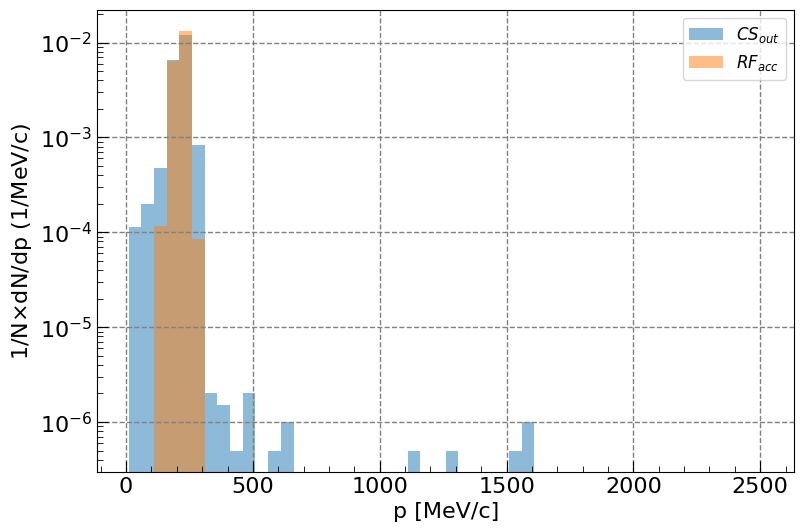

In [17]:
nbin_E_CS = 50
range_E_CS = (10, 2510) #MeV

plot_EorPspectrum(p=df_CS_out['p[MeV/c]'], lbl='$CS_{out}$', \
                  p2=df_RF_acc['p[MeV/c]'], lbl2='$RF_{acc}$', \
                  isE=False, plotLog=True, opacity=0.5, \
                  IWantDensity=True, NormMax=False, \
                  nbin_E=nbin_E_CS, range_E=range_E_CS, solidPlot=True, \
                  myoutpath=outpath+case+"_CS_out_", saveFigs=saveFigs)

## Get the phase space of the positrons accepted

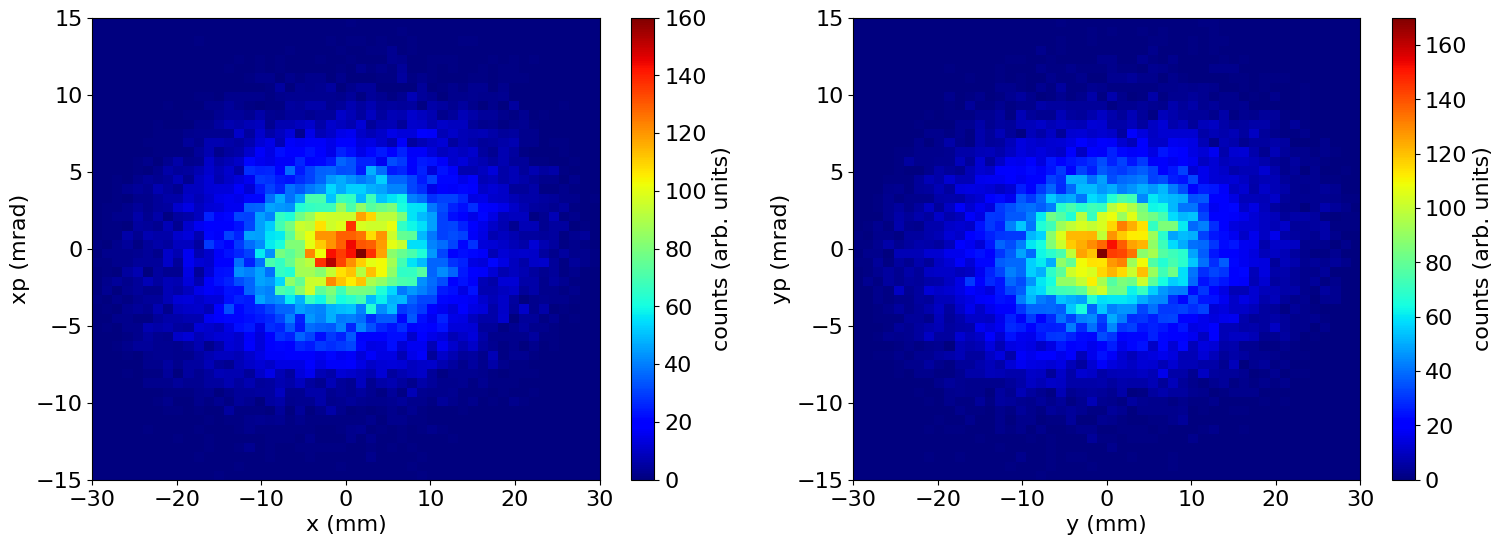

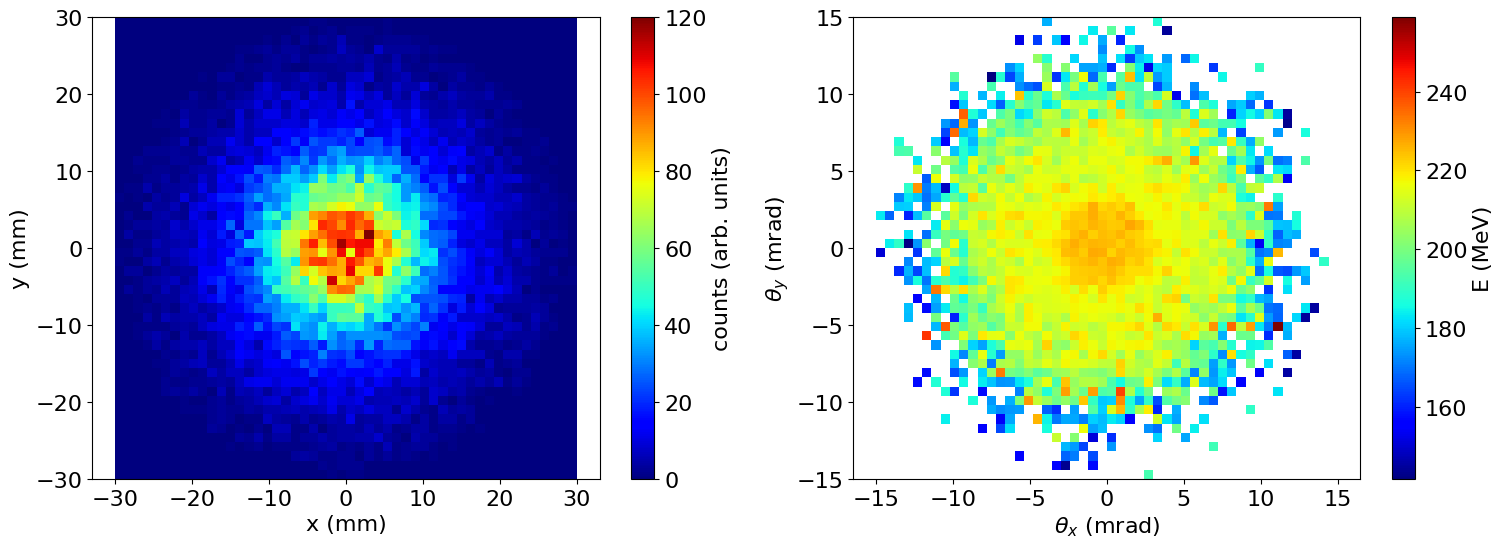

--------------------------------------------------

Beam trace-space Emittances:
em_x_tr = 3.43e-05 m*rad
em_y_tr = 3.44e-05 m*rad
Beam trace-space Emittances:
em_x_n_tr = 1.45e-02 m*rad
em_y_n_tr = 1.46e-02 m*rad
Beam Emittances:
em_x = 6.50e-05 m*rad
em_y = 6.51e-05 m*rad
Beam normalized Emittances:
em_x_n = 1.41e-02 m*rad
em_y_n = 1.41e-02 m*rad

sigma_x = 9.03 mm
sigma_y = 9.08 mm
sigma_xp = 3.81 mrad
sigma_yp = 3.79 mrad
sigma_px = 0.80 MeV/c
sigma_py = 0.80 MeV/c

theta_mean = 4.6745e-03 rad
theta_std = 2.6561e-03 rad
theta_rms = 5.3765e-03 rad
theta_max = 1.5941e-02 rad
--------------------------------------------------

bunch_length = 2.72 mm

mean_energy = 216.3722 MeV
std_energy = 20.4126 MeV
energy_spread = 0.0943
gamma = 423.4290
delta_gamma = 39.9465
--------------------------------------------------

NMP = 30229

--------------------------------------------------

Twiss parameters (calculated using em_x,y_tr):
alpha_x = -0.0915
alpha_y = -0.0743
beta_x = 2.379900 m
beta_y

In [18]:
angleLim = 15 #mrad

plot_RFTrack_transverse_phase_space(df_RF_acc, radius_sel=R_iris_CS, \
                                    num_bins_x=50, num_bins_xp=50, \
                                    num_bins_y=50, num_bins_yp=50, \
                                    xrange=[-R_iris_CS, R_iris_CS], xprange=[-angleLim, angleLim], \
                                    yrange=[-R_iris_CS, R_iris_CS], yprange=[-angleLim, angleLim], \
                                    use_log_scale=False, mymap='jet', \
                                    myoutpath=outpath+case+"_RF_acc_", saveFigs=saveFigs)

norm_em_RF_acc, Twiss_RF_acc = calc_RFTrack_beam_properties(df_RF_acc, m=0.511, beVerbose=True)

## Plot the longitudinal phase space of the positrons at the exit of the PL

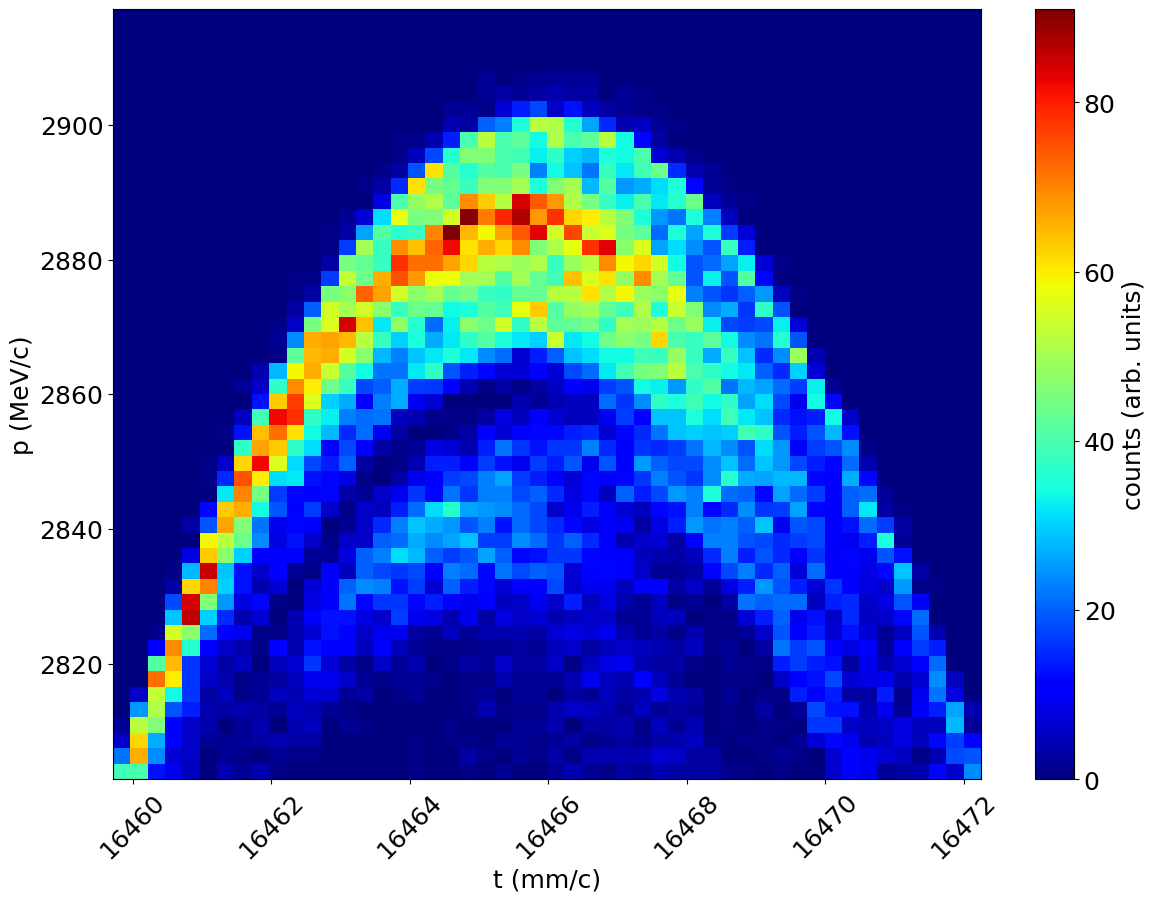

pspread: 0.84%




In [19]:
pmean = 2.86 #GeV
prel = 0.02
if '_6GeV' in path_G4:
    pmean = 1.54 #GeV
    prel = 0.038

range_cut = ([df_PL_acc.describe()['t[mm/c]'].loc['min'], df_PL_acc.describe()['t[mm/c]'].loc['max']], \
             [pmean*(1-prel)*1e3, pmean*(1+prel)*1e3])

plot_RFTrack_longitudinal_phase_space(df_PL_acc, \
                                      num_bins_x=50, num_bins_y=50, myrange=range_cut, \
                                      use_log_scale=False, mymap='jet', \
                                      myoutpath=outpath+case+"_PL_acc_", saveFigs=saveFigs)

pspread = np.std(df_PL_acc['p[MeV/c]'].values) / np.mean(df_PL_acc['p[MeV/c]'].values)
print("pspread: %.2f%%\n\n" % (pspread*100))

## Read the text files with the phase space of the POSITRONS LOST within the CS

In [20]:
df_CS_loss = pd.read_csv(path_RFTrack + filename_CS_loss + '.dat', sep=" ", header=5, skip_blank_lines=True)
row1_list = [round(float(df_CS_loss.columns[1:][i]), len(df_CS_loss)) for i in range(len(df_CS_loss.columns)-1)]
additional_col = ['z[mm]', 'm[MeV/c2]', 'Q', 'N']
col_copy = columns.copy()
if 'ID' in columns: 
    col_copy.remove('ID')
    additional_col.append('ID')
columns_loss = col_copy + additional_col
row1_dict = {}
for i in range(len(columns_loss)):
    row1_dict[columns_loss[i]] = row1_list[i]
row1 = pd.DataFrame(row1_dict, index =[0])
df_CS_loss = df_CS_loss.iloc[:,1:]
df_CS_loss.columns = columns_loss
df_CS_loss = pd.concat([row1, df_CS_loss]).reset_index(drop=True)
df_CS_loss.drop(columns=df_CS_loss.columns[7:10], axis=1, inplace=True)
print("number of particles lost within the CS: %d\n" % len(df_CS_loss))
df_CS_loss.describe()

number of particles lost within the CS: 28340



x[mm]       xp[mrad]         y[mm]      yp[mrad]       t[mm/c]  \
count  28340.000000   28340.000000  28340.000000  2.834000e+04  28340.000000   
mean      -0.040995      40.732480     -0.084707  3.364090e+01    780.480130   
std       22.366139    8292.738161     22.490531  1.618567e+04   1525.862670   
min      -81.374829 -682472.210585    -76.913240 -7.000425e+05    258.196580   
25%      -21.300890     -62.215400    -21.531340 -6.226209e+01    303.734087   
50%       -0.215502      -0.785524     -0.197726 -2.135422e-01    403.530077   
75%       21.379605      60.684390     21.463783  6.209959e+01    630.720241   
max       80.872156  802301.598262     75.487560  2.450741e+06  16455.986838   

           p[MeV/c]         z[mm]            ID  
count  28340.000000  28340.000000  28340.000000  
mean      81.927893    520.443817  35305.405469  
std      125.958072   1513.977538  20477.068025  
min        0.018127     16.429869      1.000000  
25%       18.768601     39.948897  17572.000000  
50%       34.983709    151.129760  35224.500000  
75%       95.626882    373.491485  52987.250000  
max     2007.071189  16171.810617  70856.000000

In [21]:
"""
plt.figure(figsize=(7,5))
fs = 18
plt.scatter(df_CS_loss['z[mm]'], df_CS_loss['t[mm/c]'], label='e+ lost within the CS')
plt.legend(fontsize=fs*0.75)
plt.xlabel('z (mm)', fontsize=fs)
plt.ylabel('t (mm/c)', fontsize=fs)
plt.show()
"""

"\nplt.figure(figsize=(7,5))\nfs = 18\nplt.scatter(df_CS_loss['z[mm]'], df_CS_loss['t[mm/c]'], label='e+ lost within the CS')\nplt.legend(fontsize=fs*0.75)\nplt.xlabel('z (mm)', fontsize=fs)\nplt.ylabel('t (mm/c)', fontsize=fs)\nplt.show()\n"

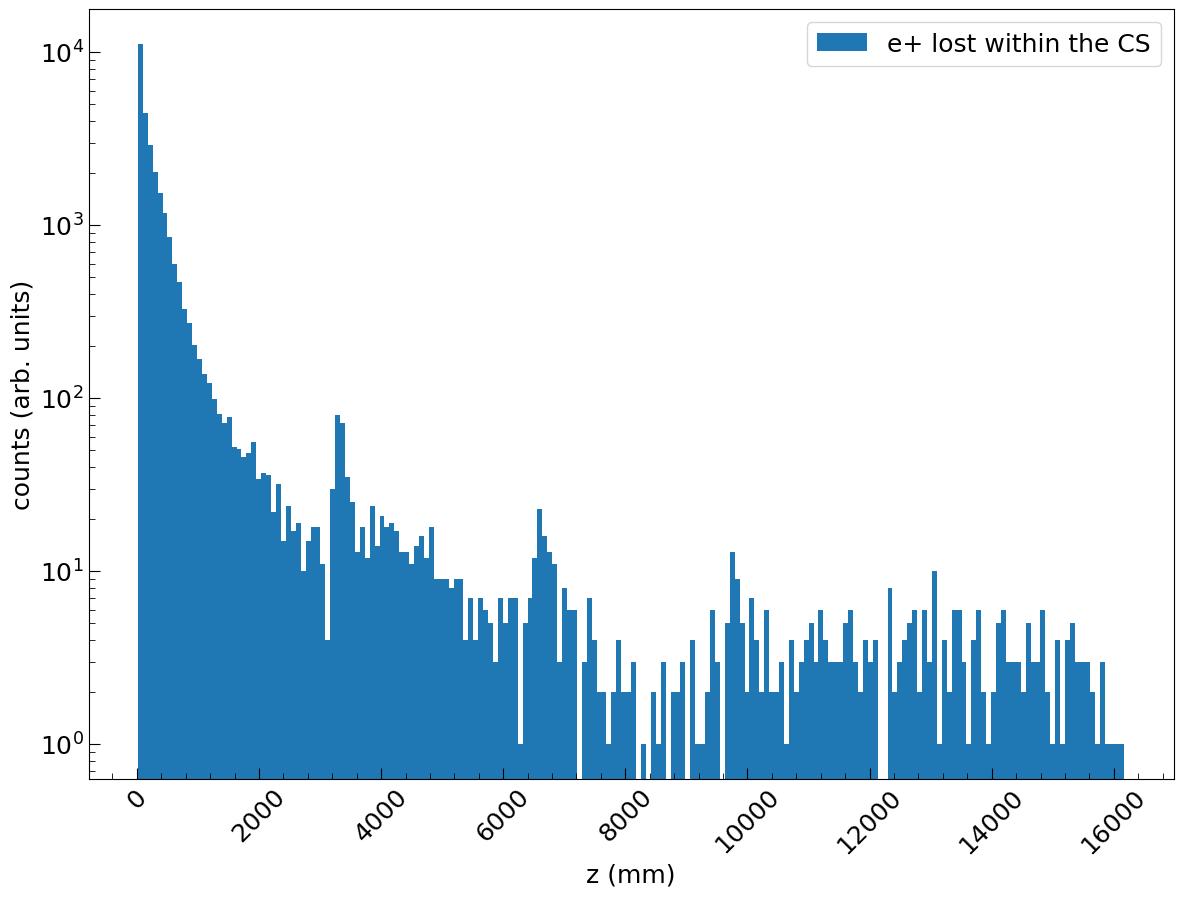

In [22]:
plt.figure(figsize=(14, 10))
fs = 18
plt.hist(df_CS_loss['z[mm]'], bins=200, \
         label='e+ lost within the CS', \
         #range=(0, 16200)
        )
plt.legend(fontsize=fs)
plt.xlabel('z (mm)', fontsize=fs)
plt.ylabel('counts (arb. units)', fontsize=fs)
plt.xticks(fontsize=fs, rotation=45)
plt.yticks(fontsize=fs, rotation=0)
plt.gca().xaxis.set_minor_locator(AutoMinorLocator(5))
plt.gca().yaxis.set_minor_locator(AutoMinorLocator(5))
plt.gca().tick_params(axis="both", which='major', direction='in', length=8)
plt.gca().tick_params(axis="both", which='minor', direction='in', length=4)
plt.yscale('log')
if saveFigs:
    plt.savefig(outpath+case+'_CS_loss_z.jpg')
plt.show()

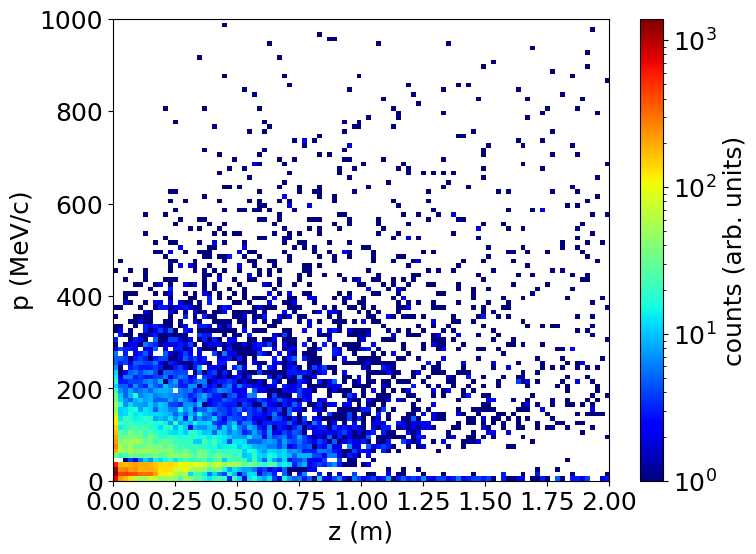

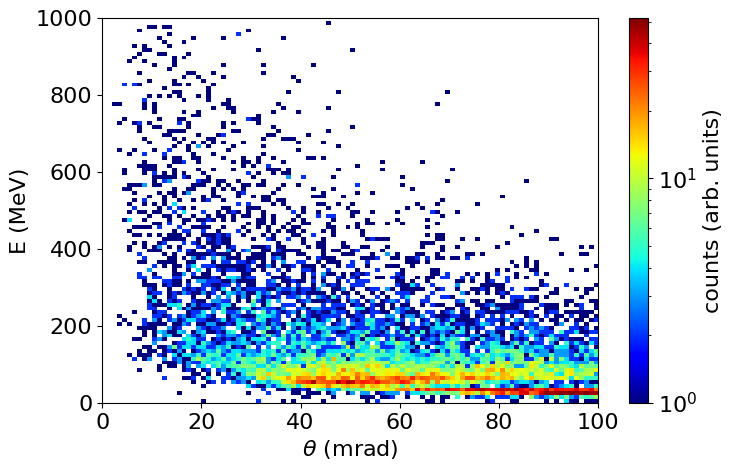

In [23]:
num_bins_x = 100
num_bins_y = 100
use_log_scale = True 

# histo2D of z and p
fig, ax = plt.subplots(figsize=(8, 6))
hist_matrix1, x_edges1, y_edges1 = np.histogram2d(df_CS_loss['z[mm]']*1e-3, df_CS_loss['p[MeV/c]'], \
                                                  bins=(num_bins_x, num_bins_y), \
                                                  range=([0, 2.], [0, 1000]), \
                                                 )
img = ax.imshow(hist_matrix1.T, cmap='jet', interpolation="None", aspect='auto', origin='lower', 
                extent=[x_edges1[0], x_edges1[-1], y_edges1[0], y_edges1[-1]]
               )
if use_log_scale:
    img.set_norm(mcolors.LogNorm())
cbar = plt.colorbar(img, ax=ax, label='Frequency')
cbar.set_label('counts (arb. units)', fontsize=fs, rotation=90)
cbar.ax.tick_params(labelsize=fs)
ax.set_xlabel('z (m)', fontsize=fs)
ax.set_ylabel('p (MeV/c)', fontsize=fs)
plt.xticks(fontsize=fs, rotation=0)
plt.yticks(fontsize=fs, rotation=0)
#ax.invert_yaxis()
if saveFigs: 
    plt.savefig(outpath+case+'_CS_loss_EvsZ.jpg')
plt.show()

# add the tranverse angle to the loss dataframe
df_CS_loss['th[mrad]'] = (df_CS_loss['xp[mrad]']**2 + df_CS_loss['yp[mrad]']**2)**0.5

# histo2D of theta and p
plot_EvsTheta(df_CS_loss['th[mrad]'], df_CS_loss['p[MeV/c]'], \
              num_bins_theta=num_bins_x, num_bins_energy=num_bins_y, \
              theta_range=[0, 100.], energy_range=[0, 1000.], \
              use_log_scale=True, mymap='jet', \
              myoutpath=outpath+case+"_CS_loss_", saveFigs=saveFigs)

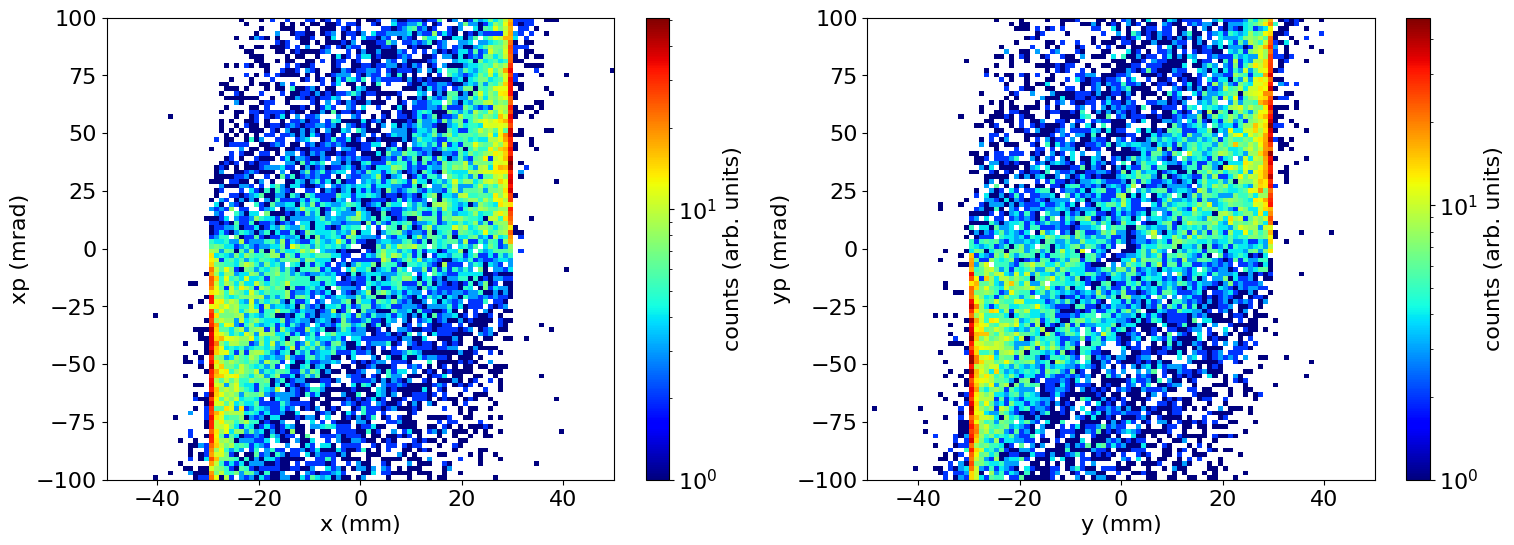

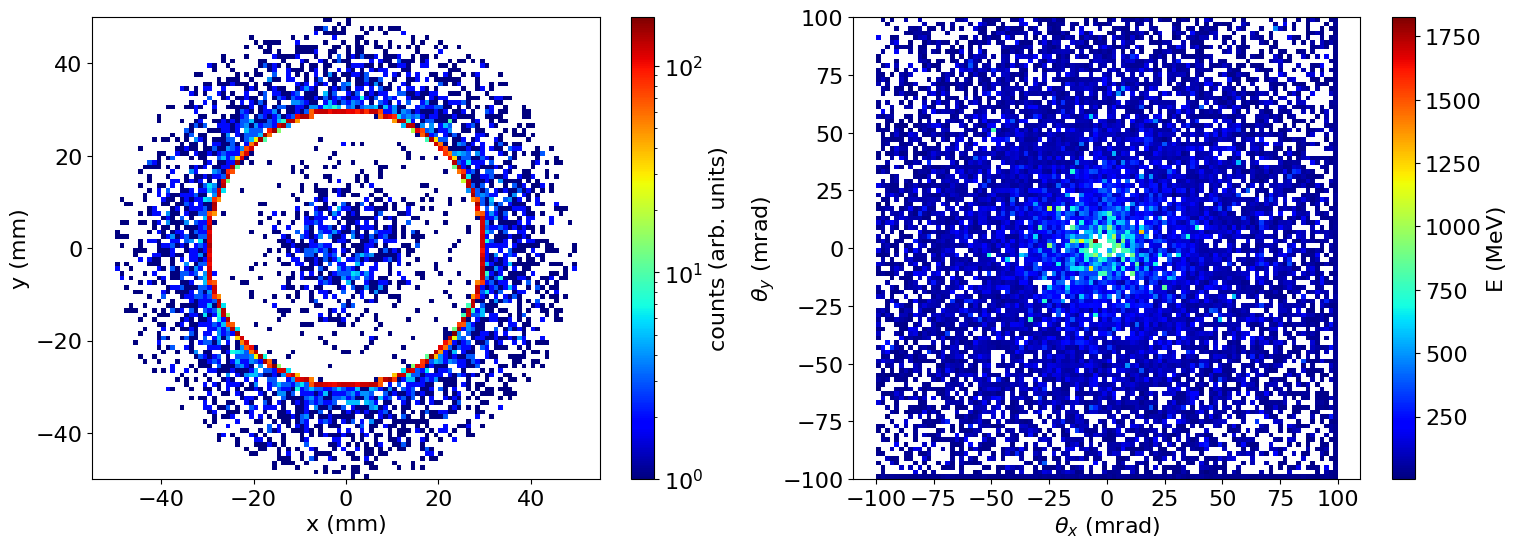

In [24]:
xylim = 50 #mm
xpyplim = 100 #mrad
plot_RFTrack_transverse_phase_space(df_CS_loss, radius_sel=xylim, \
                                    num_bins_x=100, num_bins_xp=100, \
                                    num_bins_y=100, num_bins_yp=100, \
                                    xrange=[-xylim, xylim], xprange=[-xpyplim, xpyplim], \
                                    yrange=[-xylim, xylim], yprange=[-xpyplim, xpyplim], \
                                    use_log_scale=True, mymap='jet', \
                                    myoutpath=outpath+case+"_CS_loss_", saveFigs=saveFigs)

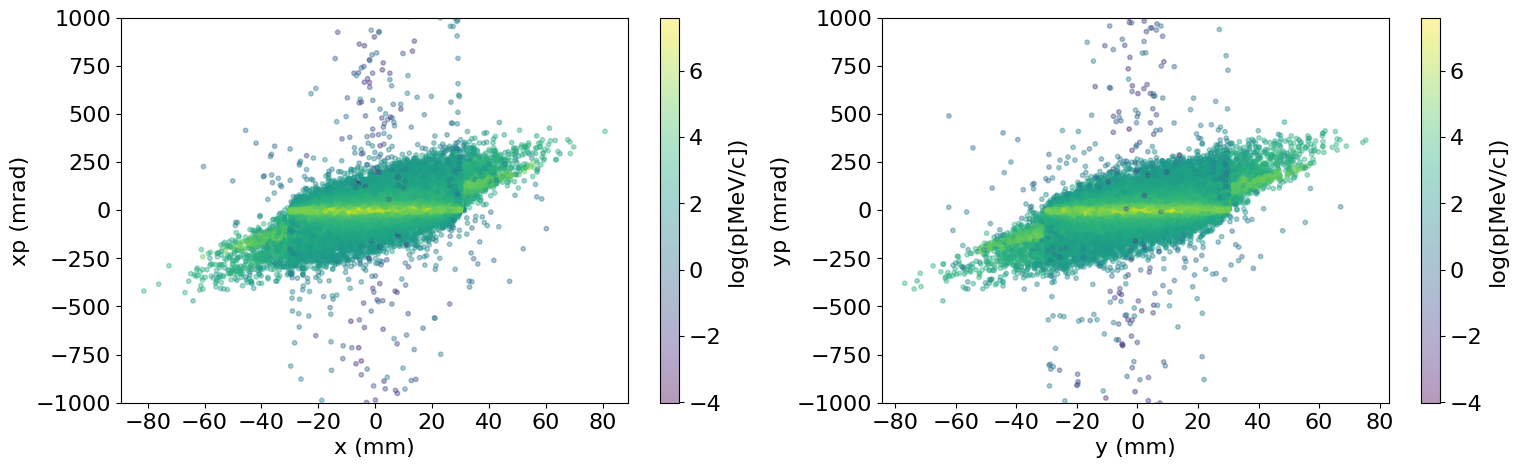

In [25]:
plot_RFTrack_xpx_ypy(df_CS_loss, m=0.511, radius_sel=1e2, \
                     angleLim=1000, use_log_scale=True, \
                     myoutpath=outpath+case+"_CS_loss_", saveFigs=saveFigs)

In [26]:
# apply a selection in momentum and radial position
P_cut = 2860 #MeV/c
R_cut = 29.7 #mm
#R_cut = R_iris_CS
df_CS_loss_sel = df_CS_loss[(df_CS_loss['p[MeV/c]'] < P_cut) & (df_CS_loss['x[mm]']**2 + df_CS_loss['y[mm]']**2 < R_cut**2)] 
print("fraction of particles lost within a radius of %.0f mm: %d%%\n" % (R_cut, len(df_CS_loss_sel)/len(df_CS_loss)*100))

fraction of particles lost within a radius of 30 mm: 3%



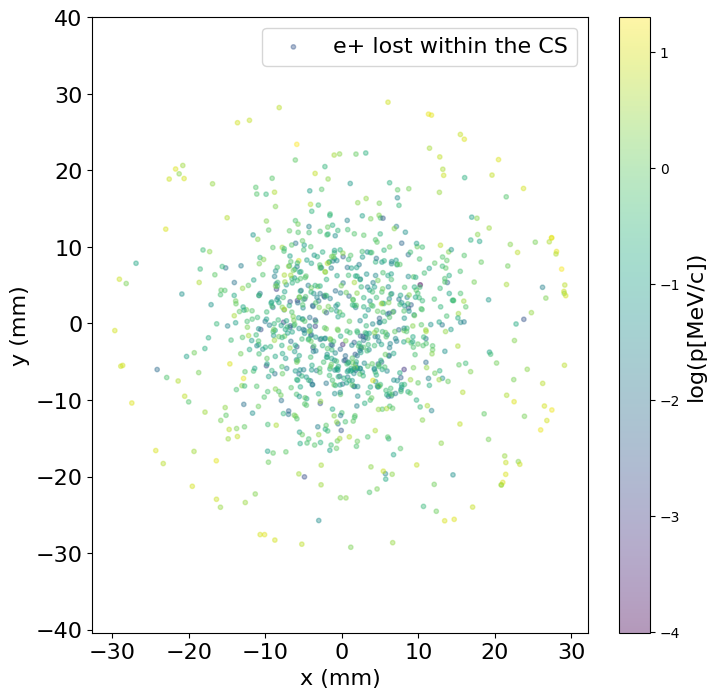

In [27]:
plot_RFTrack_weighted_scatterplots(df_CS_loss_sel, pd.DataFrame(), lbl1='e+ lost within the CS', lbl2='e+ accepted @ DR', \
                                   weightThem=True, weightVar='log(p)', myoutpath=outpath+case+'_CS_loss_acc_', saveFigs=True)

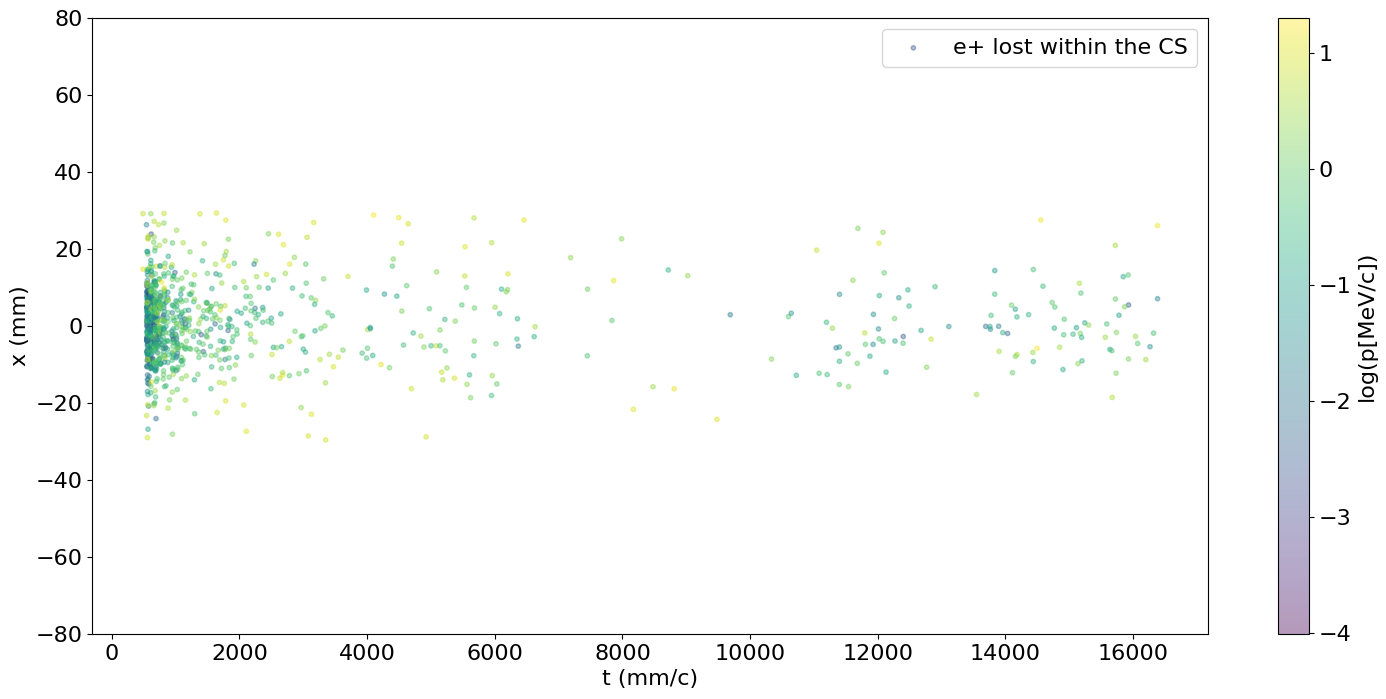

In [28]:
# plot x vs z/t  
plot_RFTrack_x_vs_z(df_CS_loss_sel, lbl='e+ lost within the CS', weight='p[MeV/c]') #p[MeV/c], th[mrad]

## Plot the distributions of the produced positrons that are later lost within the CS

In [29]:
df_AMD_in_lost = df_AMD_in_sel[df_AMD_in_sel.ID.isin(df_CS_loss.ID.unique().tolist())]

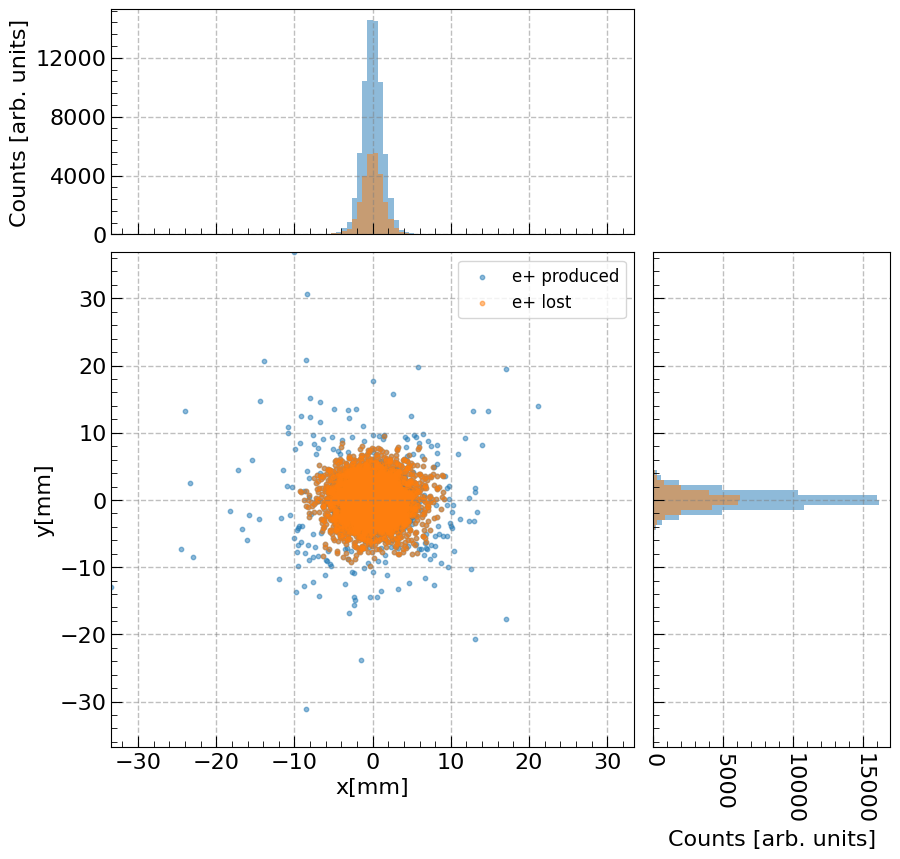

In [30]:
two_scatterplot_with_hist(df_AMD_in_sel['x[mm]'], df_AMD_in_sel['y[mm]'], df_AMD_in_lost['x[mm]'], df_AMD_in_lost['y[mm]'], \
                          lbl1='e+ produced', lbl2='e+ lost', xlabel='x[mm]', ylabel='y[mm]', opacity=0.5,\
                          nbins=100, myoutpath=outpath+case+"_lost_xy_", saveFigs=saveFigs)

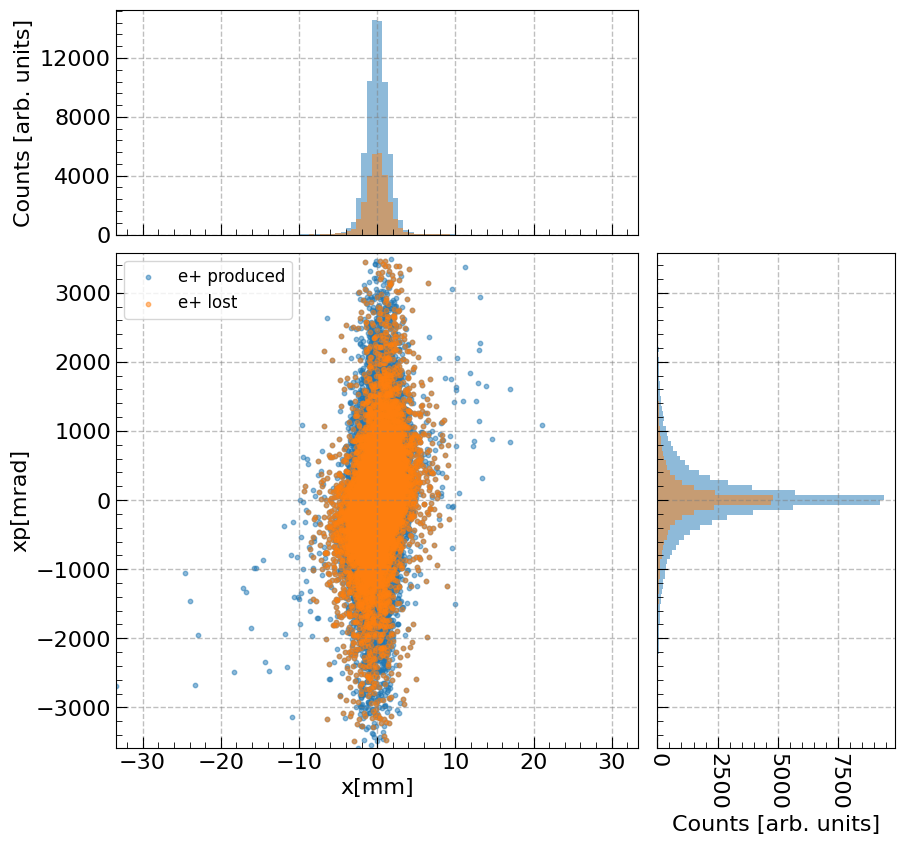

In [31]:
two_scatterplot_with_hist(df_AMD_in_sel['x[mm]'], df_AMD_in_sel['xp[mrad]'], df_AMD_in_lost['x[mm]'], df_AMD_in_lost['xp[mrad]'], \
                          lbl1='e+ produced', lbl2='e+ lost', xlabel='x[mm]', ylabel='xp[mrad]', opacity=0.5, \
                          nbins=100, myoutpath=outpath+case+"_lost_xxp_", saveFigs=saveFigs)

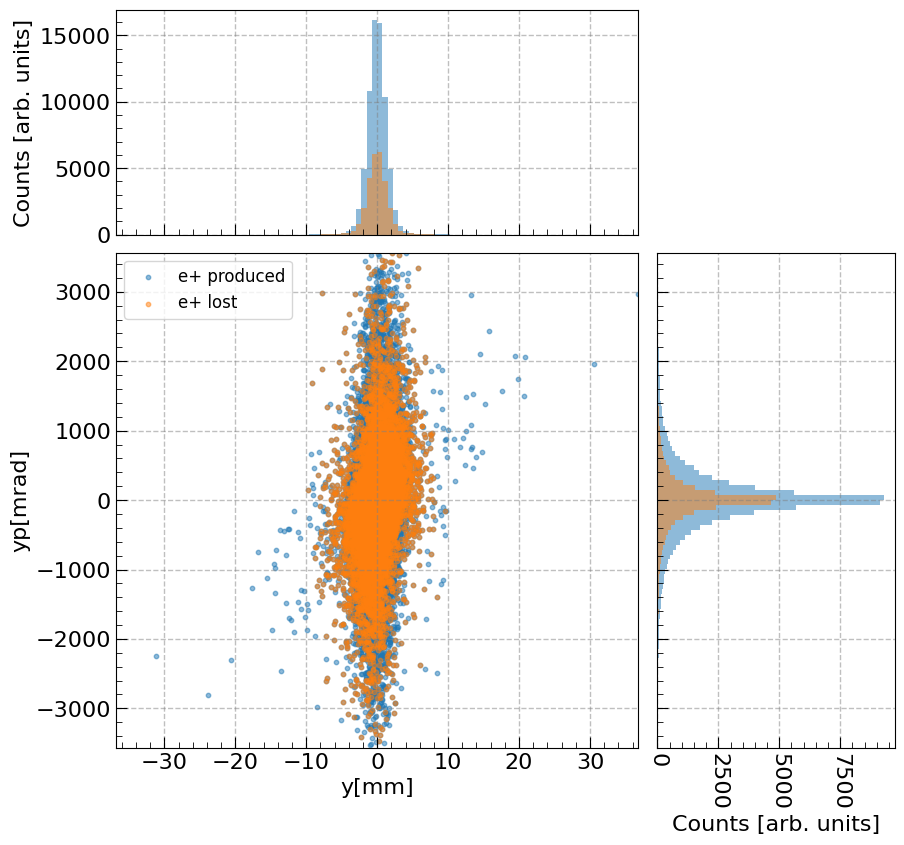

In [32]:
two_scatterplot_with_hist(df_AMD_in_sel['y[mm]'], df_AMD_in_sel['yp[mrad]'], df_AMD_in_lost['y[mm]'], df_AMD_in_lost['yp[mrad]'], \
                          lbl1='e+ produced', lbl2='e+ lost', xlabel='y[mm]', ylabel='yp[mrad]', opacity=0.5, \
                          nbins=100, myoutpath=outpath+case+"_lost_yyp_", saveFigs=saveFigs)

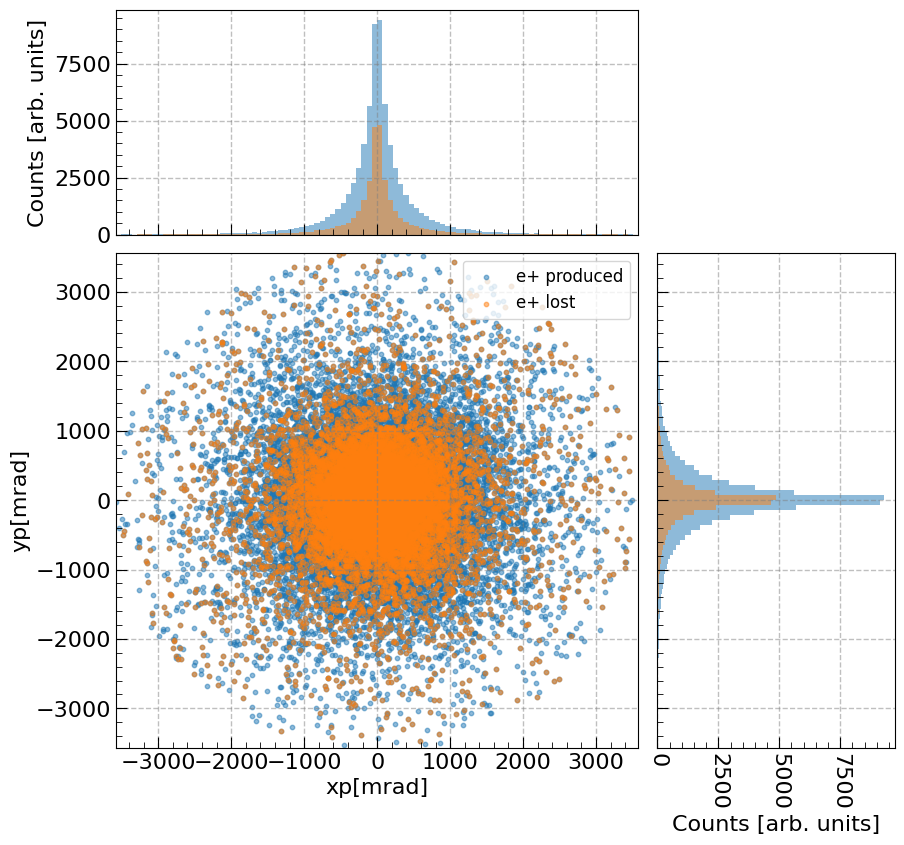

In [33]:
two_scatterplot_with_hist(df_AMD_in_sel['xp[mrad]'], df_AMD_in_sel['yp[mrad]'], df_AMD_in_lost['xp[mrad]'], df_AMD_in_lost['yp[mrad]'], \
                          lbl1='e+ produced', lbl2='e+ lost', xlabel='xp[mrad]', ylabel='yp[mrad]', opacity=0.5, \
                          nbins=100, myoutpath=outpath+case+"_lost_xpyp_", saveFigs=saveFigs)

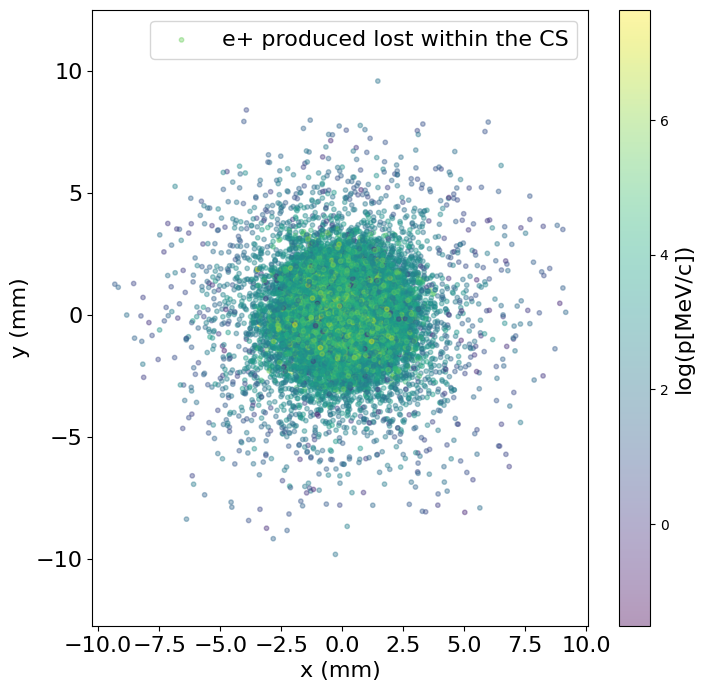

In [34]:
plot_RFTrack_weighted_scatterplots(df_AMD_in_lost, pd.DataFrame(), lbl1='e+ produced lost within the CS', lbl2='', \
                                   weightThem=True, myoutpath=outpath+case+'_produced_lost_', saveFigs=True)

## Plot the distributions of the produced positrons that are later accepted at the DR

In [35]:
#df_AMD_in_acc_DR = df_AMD_in_sel[~df_AMD_in_sel.ID.isin(df_CS_loss.ID.unique().tolist())]
df_AMD_in_acc_DR = df_AMD_in_sel[df_AMD_in_sel.ID.isin(df_RF_acc.ID.unique().tolist())]

lbl_prod = 'e+ produced in the target, yield: %.2f' % (len(df_AMD_in)/Ne)
lbl_acc = 'e+ accepted at the DR, yield: %.2f' % (len(df_RF_acc)/Ne)

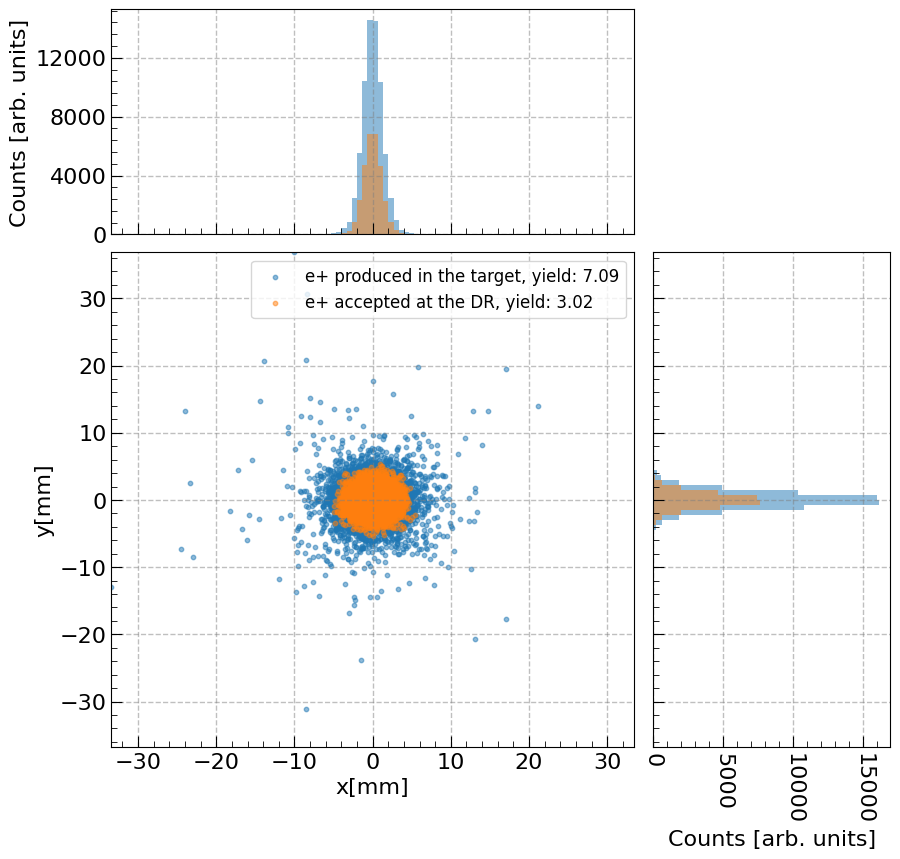

In [36]:
two_scatterplot_with_hist(df_AMD_in_sel['x[mm]'], df_AMD_in_sel['y[mm]'], df_AMD_in_acc_DR['x[mm]'], df_AMD_in_acc_DR['y[mm]'], \
                          lbl1=lbl_prod, lbl2=lbl_acc, xlabel='x[mm]', ylabel='y[mm]', opacity=0.5,\
                          nbins=100, myoutpath=outpath+case+"_AMD_in_xy_", saveFigs=saveFigs)

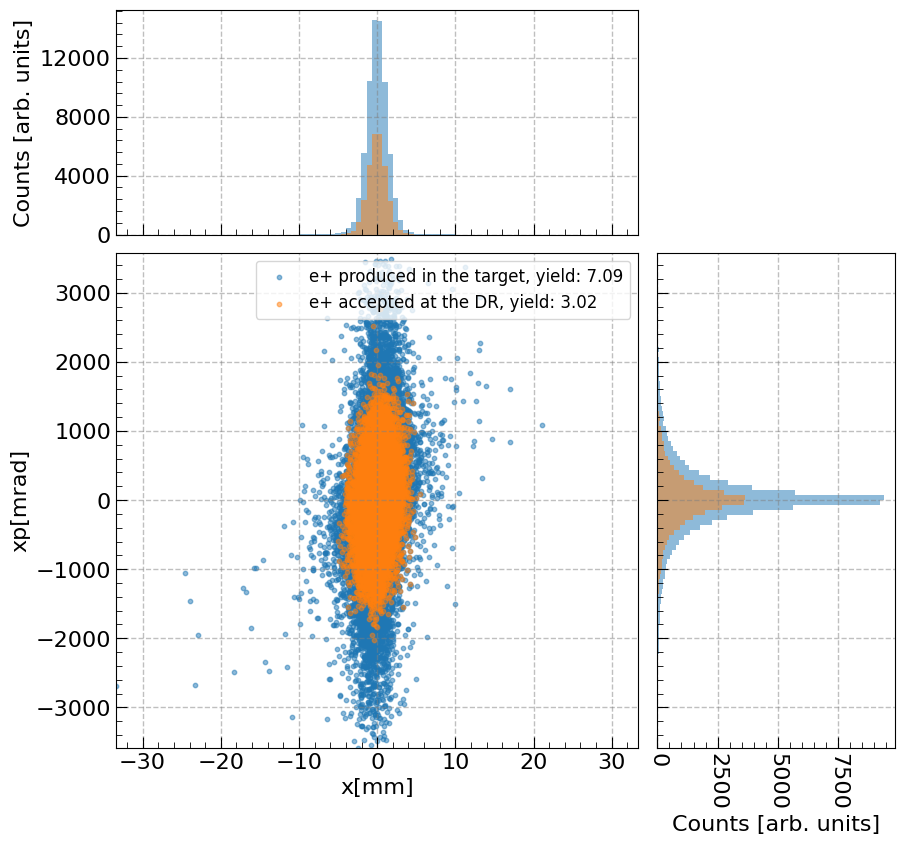

In [37]:
two_scatterplot_with_hist(df_AMD_in_sel['x[mm]'], df_AMD_in_sel['xp[mrad]'], df_AMD_in_acc_DR['x[mm]'], df_AMD_in_acc_DR['xp[mrad]'], \
                          lbl1=lbl_prod, lbl2=lbl_acc, xlabel='x[mm]', ylabel='xp[mrad]', opacity=0.5, \
                          nbins=100, myoutpath=outpath+case+"_AMD_in_xxp_", saveFigs=saveFigs)

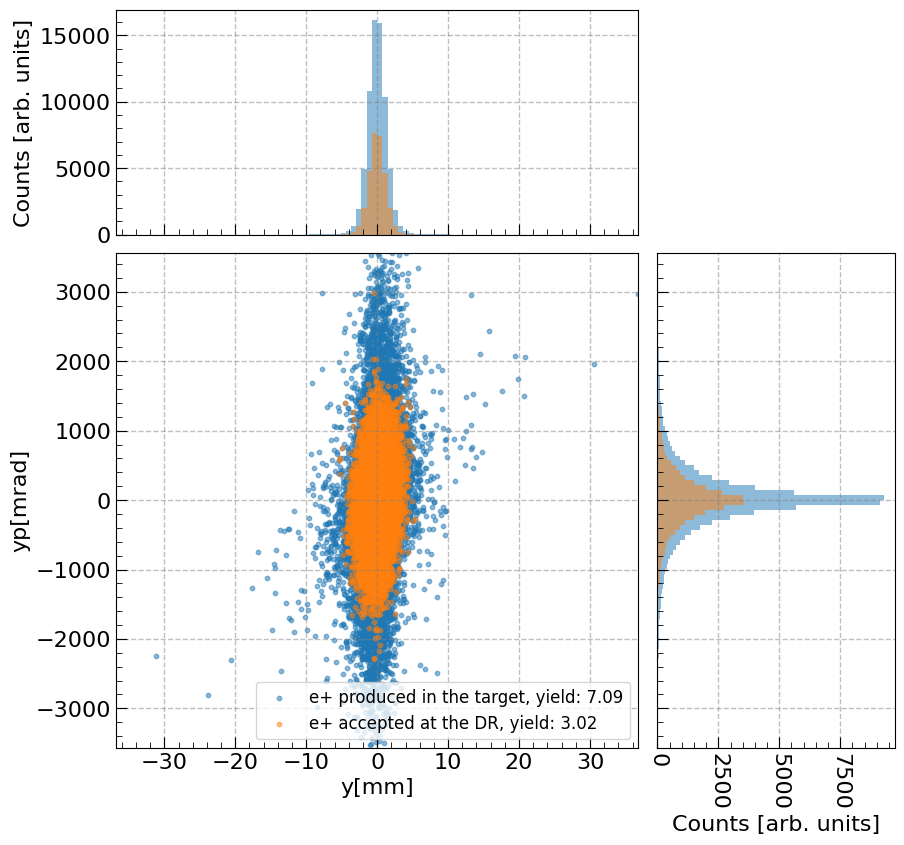

In [38]:
two_scatterplot_with_hist(df_AMD_in_sel['y[mm]'], df_AMD_in_sel['yp[mrad]'], df_AMD_in_acc_DR['y[mm]'], df_AMD_in_acc_DR['yp[mrad]'], \
                          lbl1=lbl_prod, lbl2=lbl_acc, xlabel='y[mm]', ylabel='yp[mrad]', opacity=0.5, \
                          nbins=100, myoutpath=outpath+case+"_AMD_in_yyp_", saveFigs=saveFigs)

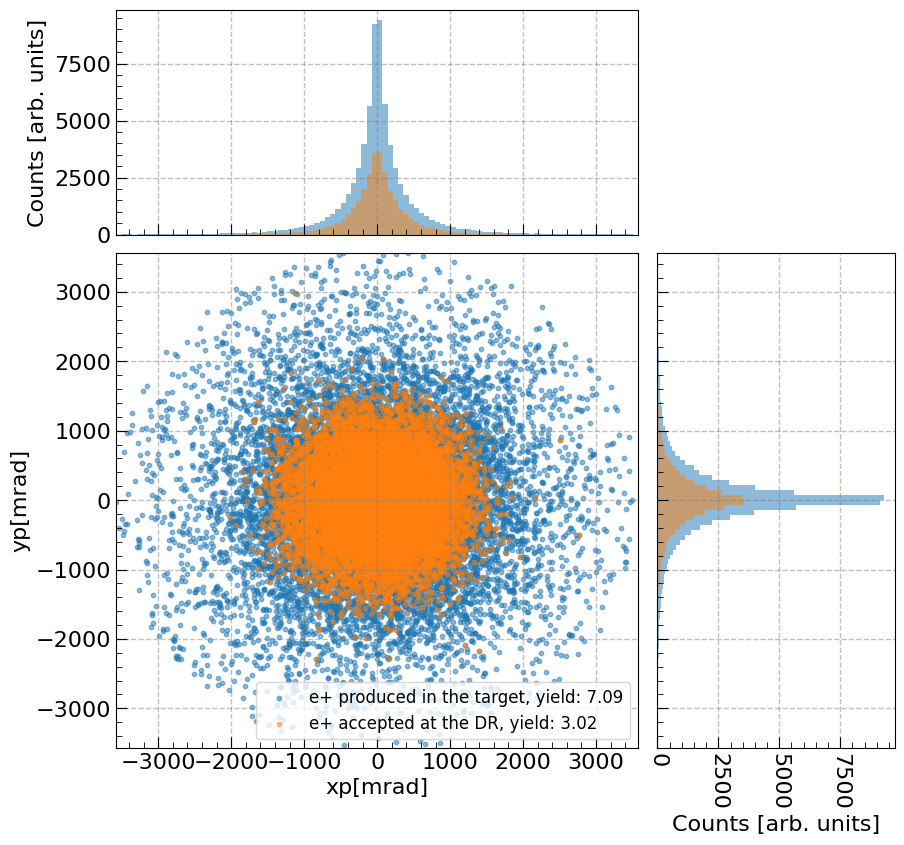

In [39]:
two_scatterplot_with_hist(df_AMD_in_sel['xp[mrad]'], df_AMD_in_sel['yp[mrad]'], df_AMD_in_acc_DR['xp[mrad]'], df_AMD_in_acc_DR['yp[mrad]'], \
                          lbl1=lbl_prod, lbl2=lbl_acc, xlabel='xp[mrad]', ylabel='yp[mrad]', opacity=0.5, \
                          nbins=100, myoutpath=outpath+case+"_AMD_in_xpyp_", saveFigs=saveFigs)

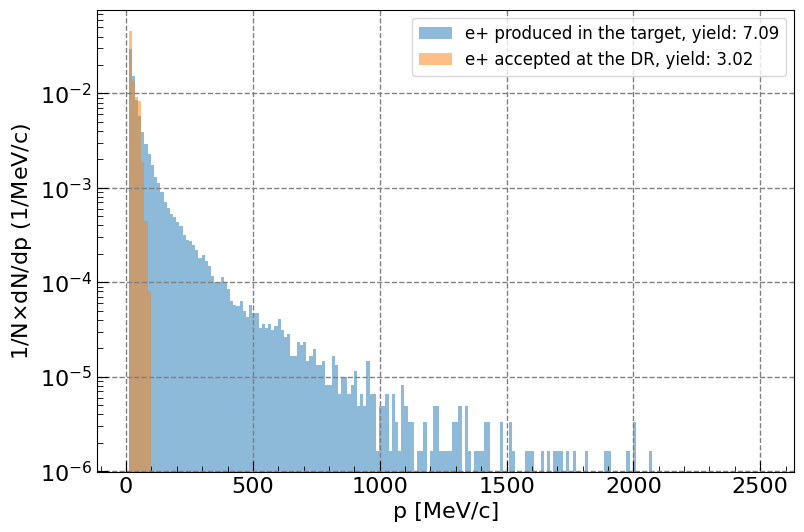

In [40]:
plot_EorPspectrum(df_AMD_in['p[MeV/c]'], lbl=lbl_prod, \
                  p2=df_AMD_in_acc_DR['p[MeV/c]'], lbl2=lbl_acc, \
                  isE=False, plotLog=True, opacity=0.5, \
                  IWantDensity=True, NormMax=False, \
                  nbin_E=200, range_E=range_E_CS, solidPlot=True, \
                  myoutpath=outpath+case+"_AMD_in_", saveFigs=saveFigs)

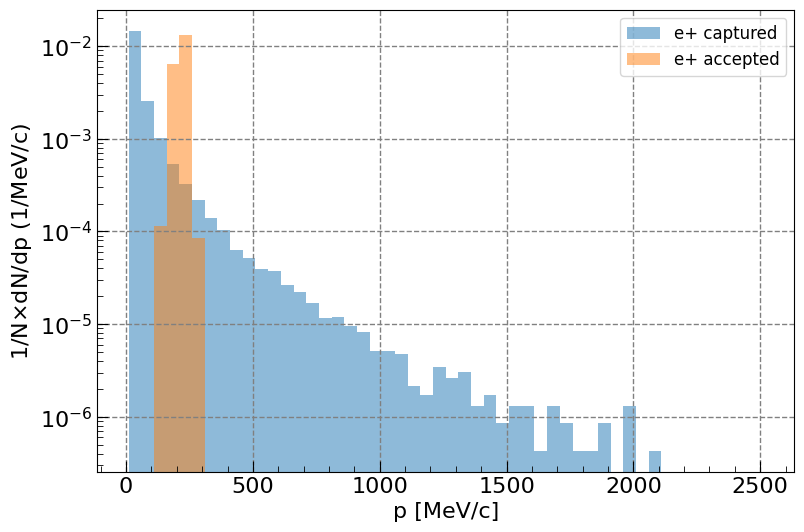

In [41]:
plot_EorPspectrum(df_AMD_out['p[MeV/c]'], lbl='e+ captured', \
                  p2=df_RF_acc['p[MeV/c]'], lbl2='e+ accepted', \
                  isE=False, plotLog=True, opacity=0.5, \
                  IWantDensity=True, NormMax=False, solidPlot=True, \
                  nbin_E=nbin_E_CS, range_E=range_E_CS, \
                  myoutpath=outpath+case+"_CS_out_", saveFigs=saveFigs)